#  Lecture 2B: Genome Indexing - Suffix-based Algorithms
___

In previous lecture, we have talked about the substring-based approaches for indexing a genome. Here we will present some of the indexing methods using the suffix of the genome.

## 1. Suffix trie

In [2]:
class SuffixTrie(object):
    """ Encapsulates a suffix trie of a provided string t """
    
    def __init__(self, t):
        """ Make suffix trie from t """
        t += '$'  # terminator symbol
        self.root = {}
        for i in range(len(t)):  # for each suffix
            cur = self.root
            for c in t[i:]:  # for each character in i'th suffix
                if c not in cur:
                    cur[c] = {}  # add outgoing edge if necessary
                cur = cur[c]
    
    def follow_path(self, s):
        """ Follow path given by characters of s.  Return node at
            end of path, or None if we fall off. """
        cur = self.root
        for c in s:
            if c not in cur:
                return None  # no outgoing edge on next character
            cur = cur[c]  # descend one level
        return cur
    
    def has_substring(self, s):
        """ Return true if s appears as a substring of t """
        return self.follow_path(s) is not None
    
    def has_suffix(self, s):
        """ Return true if s is a suffix of t """
        node = self.follow_path(s)
        return node is not None and '$' in node
    
    def to_dot(self):
        """ Return dot representation of trie to make a picture """
        lines = []
        def _to_dot_helper(node, parid):
            childid = parid
            for c, child in node.items():
                lines.append('  %d -> %d [ label="%s" ];' % (parid, childid+1, c))
                childid = _to_dot_helper(child, childid+1)
            return childid
        lines.append('digraph "Suffix trie" {')
        lines.append('  node [shape=circle label=""];')
        _to_dot_helper(self.root, 0)
        lines.append('}')
        return '\n'.join(lines) + '\n'

In [3]:
# %install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


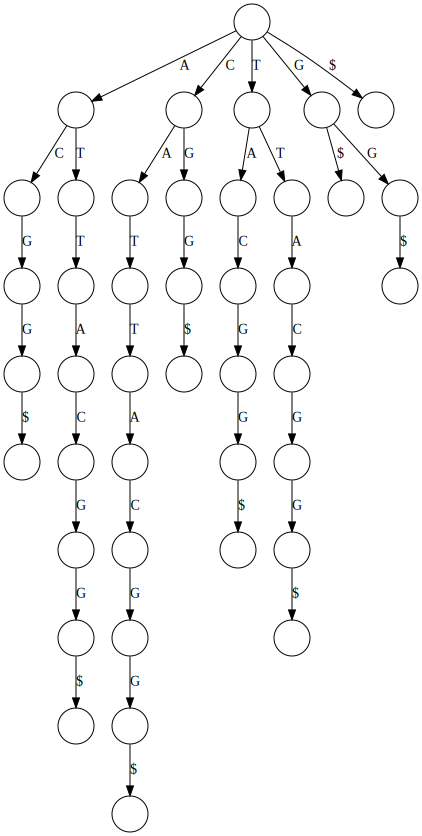

In [6]:
trie1 = SuffixTrie("CATTACGG")
%dotstr trie1.to_dot()

This is the suffix trie data structure for "CATTACGG".
- Each path from root to leaf represents a suffix; each suffix is represented by some path from root to leaf.
- **How do we check whether a string $S$ is a substring of $T$?**
    * Each of $T$'s substrings is spelled out along a path from the root, i.e., every substring is a prefix of some suffix of $T$
- **How do we check whether a string $S$ is a suffix of $T$?**
   * Similar to  above, but need additionally check of whether the final node in the walk has an outgoing edge labeled \$

In [7]:
print trie1.has_substring('ATTA')

True


In [8]:
print trie1.has_suffix('ATTA')

False


## 2. Suffix Tree

To be added.

## 3. Suffix Array

### 3.1 SA and rank


### 3.2 LCS

## 4.FM-Index

### 4.1 bwt


### 4.2 trackback


### 4.3 other issues

## Summary

To do a final analysis, the genome mapping is the issues of genome indexing and how to find the alignment from the indexes.